In [2]:
from matplotlib import rcParams

In [2]:
%matplotlib inline
from preprocess import KNeighborsImputer, rename_columns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from graphlab import logistic_classifier 
from graphlab import SFrame
from graphlab import svm_classifier
import numpy as np
import warnings

warnings.filterwarnings('ignore')

This non-commercial license of GraphLab Create for academic use is assigned to seth.s.kaufman@gmail.com and will expire on July 19, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1479621240.log


In [3]:
field_codes = {1: "Law", 2: "Math", 3: "Social Science, Psychologist", 4: "Medical Science, Pharmaceuticals, and Bio Tech", 5: "Engineering", 6: "English/Creative Writing/ Journalism", 7: "History/Religion/Philosophy", 8: "Business/Econ/Finance ", 9: "Education, Academia", 10: "Biological Sciences/Chemistry/Physics", 11: "Social Work", 12: "Undergrad/undecided ", 13:"Political Science/International Affairs", 14:"Film", 15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"}

In [4]:
frame=rename_columns(pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1"))
frame['mn_sat'] = frame.mn_sat.str.replace(r',','').astype(float)
frame['tuition'] = frame.tuition.str.replace(r',','').astype(float)
frame['income'] = frame.income.str.replace(',','').astype(float)
frame['zipcode'] = frame.zipcode.str.replace(',','').astype(float)
frame['field_cd'] = frame.field_cd.map(field_codes)

findex=frame.gender==0
mindex=frame.gender==1

In [5]:
_id = pd.Index(['iid','pid'])
personal_attributes = pd.Index(['gender','age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'initial_race_importance', 'initial_religion_importance', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])
pre_survey = pd.Index(['initial_happy_expectation', 'initial_number_expectation', 'initial_attractive_importance', 'initial_sincere_importance', 'initial_intelligence_importance', 'initial_fun_importance', 'initial_ambitious_importance', 'initial_shared_interests_importance', 'initial_attractive_same_importance', 'initial_sincere_same_importance', 'initial_intelligence_same_importance', 'initial_fun_same_importance', 'initial_ambitious_same_importance', 'initial_shared_same_importance', 'initial_attractive_opposite_importance', 'initial_sincere_opposite_importance', 'initial_intelligence_opposite_importance', 'initial_fun_opposite_importance', 'initial_ambitious_opposite_importance', 'initial_shared_opposite_importance', 'initial_attractive_self_measure', 'initial_sincere_self_measure', 'initial_fun_self_measure', 'initial_intelligence_self_measure', 'initial_ambitious_self_measure', 'initial_attractive_others_measure', 'initial_sincere_others_measure', 'initial_intelligence_others_measure', 'initial_fun_others_measure', 'initial_ambitious_others_measure'])
decisions = pd.Index(['dec','match'])
partner_attributes = pd.Index(['pid','partner','int_corr', 'samerace','age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o'])
wave_conditions = pd.Index(['condtn', 'wave', 'round', 'position','positin1', 'order'])
during_survey = pd.Index(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met'])
halfway_survey = pd.Index(['match_es', 'halfway_attractive_importance','halfway_sincere_importance', 'halfway_intelligence_importance','halfway_fun_importance', 'halfway_ambitious_importance','halfway_shared_interests_importance','halfway_attractive_self_measure', 'halfway_sincere_self_measure','halfway_intelligence_self_measure', 'halfway_fun_self_measure','halfway_ambitious_self_measure'])
followup_survey = pd.Index(['followup_overall_satisfaction','followup_length_dates_satisfaction','followup_num_dates_satisfaction','followup_attractive_influence','followup_sincere_influence','followup_intelligence_influence','followup_fun_influence','followup_ambitious_influence','followup_shared_interests_influence','followup_attractive_importance','followup_sincere_importance','followup_intelligence_importance','followup_fun_importance','followup_ambitious_importance','followup_shared_interests_importance','followup_attractive_same_importance','followup_sincere_same_importance','followup_intelligence_same_importance','followup_fun_same_importance','followup_ambitious_same_importance','followup_shared_same_importance','followup_attractive_opposite_importance','followup_sincere_opposite_importance','followup_intelligence_opposite_importance','followup_fun_opposite_importance','followup_ambitious_opposite_importance','followup_shared_opposite_importance','followup_attractive_self_measure','followup_sincere_self_measure','followup_intelligence_self_measure','followup_fun_self_measure','followup_ambitious_self_measure','followup_attractive_others_measure','followup_sincere_others_measure','followup_intelligence_others_measure','followup_fun_others_measure','followup_ambitious_others_measure',])
final_survey = pd.Index(['final_you_call_count','final_them_call_count','final_match_dates','final_num_match_seen','final_num_match_dates','final_attractive_importance','final_sincere_importance','final_intelligence_importance','final_fun_importance','final_ambitious_importance','final_shared_interests_importance','final_attractive_influence','final_sincere_influence','final_intelligence_influence','final_fun_influence','final_ambitious_influence','final_shared_interests_influence','final_attractive_same_importance','final_sincere_same_importance','final_intelligence_same_importance','final_fun_same_importance','final_ambitious_same_importance','final_shared_same_importance','final_attractive_opposite_importance','final_sincere_opposite_importance','final_intelligence_opposite_importance','final_fun_opposite_importance','final_ambitious_opposite_importance','final_shared_opposite_importance','final_attractive_self_measure','final_sincere_self_measure','final_intelligence_self_measure','final_fun_self_measure','final_ambitious_self_measure','final_attractive_others_measure','final_sincere_others_measure','final_intelligence_others_measure','final_fun_others_measure','final_ambitious_others_measure',])

In [6]:
frame.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,final_attractive_self_measure,final_sincere_self_measure,final_intelligence_self_measure,final_fun_self_measure,final_ambitious_self_measure,final_attractive_others_measure,final_sincere_others_measure,final_intelligence_others_measure,final_fun_others_measure,final_ambitious_others_measure
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,10))

In [8]:
fframe = frame.loc[findex].copy()
mframe = frame.loc[mindex].copy()

## Cleaning 

In [9]:
text_columns = frame.dtypes[(frame.dtypes==object) & (~frame.dtypes.index.str.contains('name'))].index
frame[text_columns] = frame[text_columns].apply(lambda x: x.astype('category'))
categorical_columns = frame.dtypes[frame.dtypes=='category'].index
categorical_features = frame[categorical_columns]
for col in categorical_columns:
    categorical_features[col+'_code'] = categorical_features[col].cat.codes
categorical_features.head()

,field,field_cd,undergra,from,career,field_code,field_cd_code,undergra_code,from_code,career_code
0,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
1,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
2,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
3,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
4,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300


In [10]:
unique_date = wave_conditions.drop(['condtn','positin1','round']).tolist()

attributes_columns = (pre_survey | personal_attributes | _id | ['match'] | unique_date)
attributes_frame = frame.loc[:,attributes_columns].copy()

In [11]:
attributes_frame.dropna(axis=1,thresh=8200,inplace=True)
attributes_frame.dropna(subset=['pid'],inplace=True)

for col in attributes_frame.columns:
    if hasattr(attributes_frame[col],'cat'):
        attributes_frame[col] = attributes_frame[col].cat.codes
attributes_frame = attributes_frame.replace(-1,np.nan)
attributes_frame.dropna(thresh=45,inplace=True)

In [12]:
imputer = KNeighborsImputer(n_neighbors=6)
filled_attributes_frame = imputer.fit_transform(attributes_frame).astype(int)

## Exploring

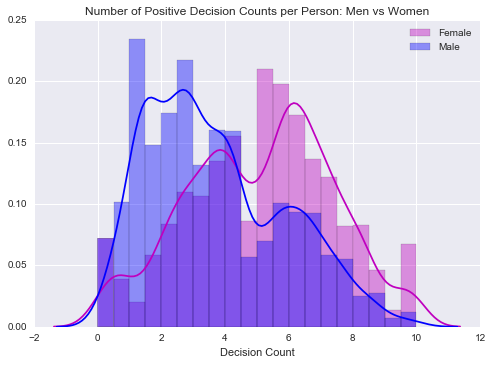

In [13]:
fframe['dec_person'] = frame.groupby(['iid'])['dec'].transform(sum)
fframe['dec_person'] = fframe.dec_person.subtract(fframe['round'])+fframe['round'].max()
fframe['dec_person'] = minmax.fit_transform(fframe['dec_person'])


mframe['dec_person'] = frame.groupby(['wave','iid'])['match'].transform(sum)
mframe['dec_person'] = mframe.dec_person.subtract(mframe['round'])+mframe['round'].max()
mframe['dec_person'] = minmax.fit_transform(mframe['dec_person'])

sns.distplot(fframe.dec_person, color="m",bins=20,label="Female")
sns.distplot(mframe.dec_person, color="b",bins=20,label='Male')
plt.title('Number of Positive Decision Counts per Person: Men vs Women')
plt.xlabel('Decision Count')
plt.legend()
plt.show()

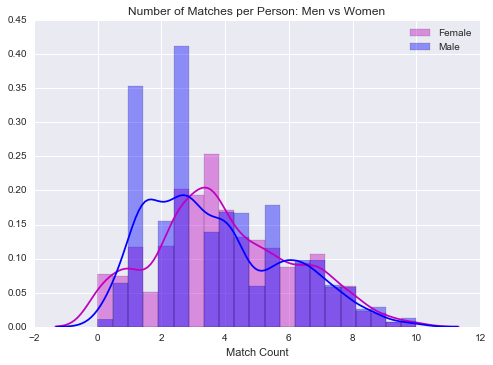

In [14]:
fframe['match_person'] = fframe.groupby(['iid'])['match'].transform(sum)
fframe['match_person'] = fframe.match_person.subtract(fframe['round'])+fframe['round'].max()
fframe['match_person'] = minmax.fit_transform(fframe['match_person'])

mframe['match_person'] = mframe.groupby(['wave','iid'])['match'].transform(sum)
mframe['match_person'] = mframe.match_person.subtract(mframe['round'])+mframe['round'].max()
mframe['match_person'] = minmax.fit_transform(mframe['match_person'])


sns.distplot(fframe.match_person, color="m",bins=21,label="Female")
sns.distplot(mframe.match_person, color="b",bins=21,label='Male')
plt.title('Number of Matches per Person: Men vs Women')
plt.xlabel('Match Count')
plt.legend()
plt.show()

In [15]:
iid_attributes = attributes_frame.groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[['field', 'field_cd', 'from', 'career']] = iid_attributes[['field', 'field_cd', 'from', 'career']].apply(lambda x: x.astype('category'))
iid_attributes['field_cd'] = iid_attributes.field_cd.map(field_codes).astype('category')
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
iid_attributes['gender'] = iid_attributes.gender.map({0:'Female',1:'Male'})
female_attributes = iid_attributes.loc[iid_attributes.gender=="Female"].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender=="Male"].drop('gender',axis=1)
#iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [16]:
gender_field = iid_attributes.copy()[['field_cd','gender']]
gender_field['field_code'] = gender_field.field_cd.cat.codes
gender_field['gender_code'] = (gender_field.gender=='Male').astype(int)
gender_field['scaled_counts'] = gender_field.field_code

ffield = gender_field.loc[gender_field.gender_code==0]
mfield = gender_field.loc[gender_field.gender_code==1]

male_field_counts = mfield.field_cd.value_counts()/mfield.field_cd.value_counts().sum()*500
female_field_counts = ffield.field_cd.value_counts()/ffield.field_cd.value_counts().sum()*500

male_field_counts.name = 'Male'
female_field_counts.name = 'Female'

combined_counts = pd.concat([male_field_counts,female_field_counts],axis=1)

combined_counts['diffMale'] = combined_counts['Male']-combined_counts['Female']
combined_counts['diffFemale'] = combined_counts['Female']-combined_counts['Male']
combined_counts.where(combined_counts>0,inplace=True)
combined_counts['diffFemale'] = -combined_counts['diffFemale']

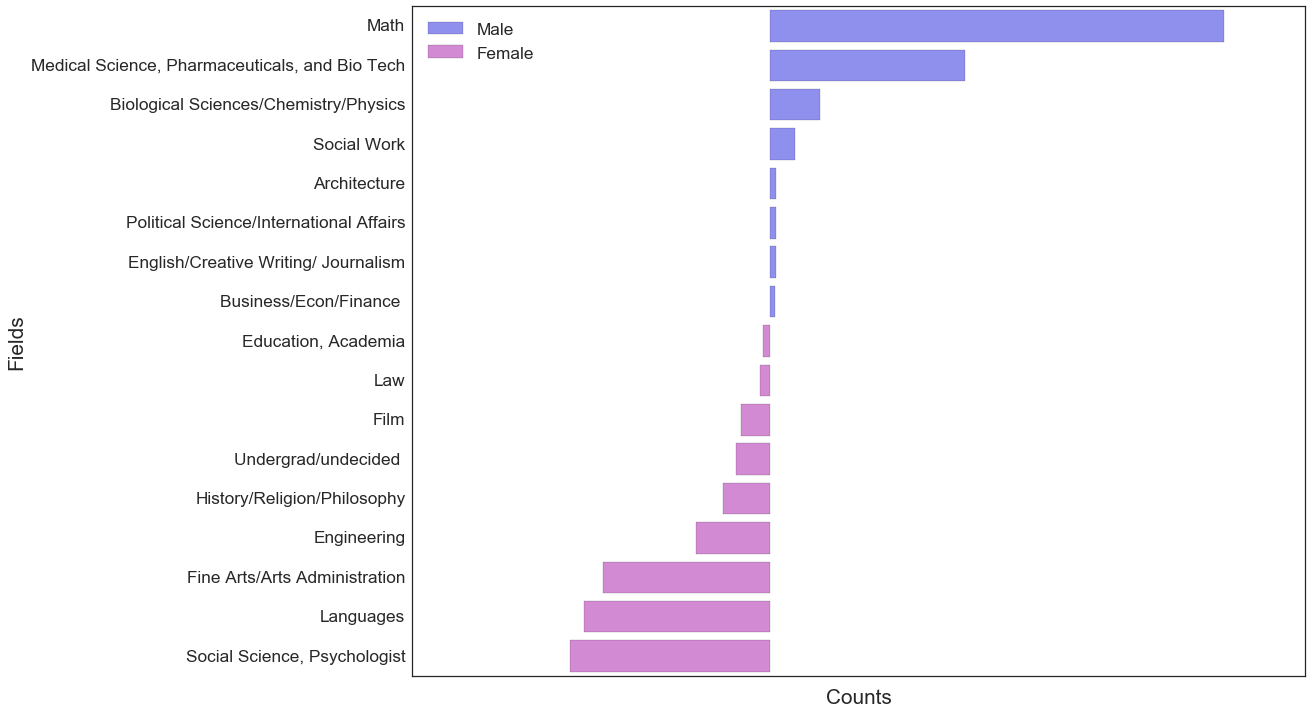

In [17]:
plot_order = combined_counts.sort_values(by=['diffMale','diffFemale'],ascending=False).index

sns.set_style('white')

plt.figure(figsize=(16,12),dpi=1000)
sns.barplot(y=combined_counts.index,x='diffMale',
            data=combined_counts,color='b',alpha=.5,order=plot_order,label='Male')
g=sns.barplot(y=combined_counts.index,x='diffFemale',
            data=combined_counts,color='m',alpha=.5,order=plot_order,label='Female')
g.set_autoscale_on(True)
g.set_rasterized(True)
plt.yticks(size='x-large',)
plt.xticks(range(1,2),'')
plt.xlabel('Counts', fontsize='xx-large')
plt.ylabel('Fields', fontsize='xx-large')
plt.legend(fontsize='x-large',loc=0);

In [18]:
from sklearn.preprocessing import scale
gender_field = iid_attributes.copy()[['field_cd','gender']]

a.dropna(inplace=True)
a[a.columns.drop('gender')] = minmax.fit_transform(a.dropna().drop('gender',axis=1))

NameError: name 'a' is not defined

In [ ]:
a=iid_attributes.loc[:,iid_attributes.columns.str.contains(r'(self|gender)')]
scale(a)

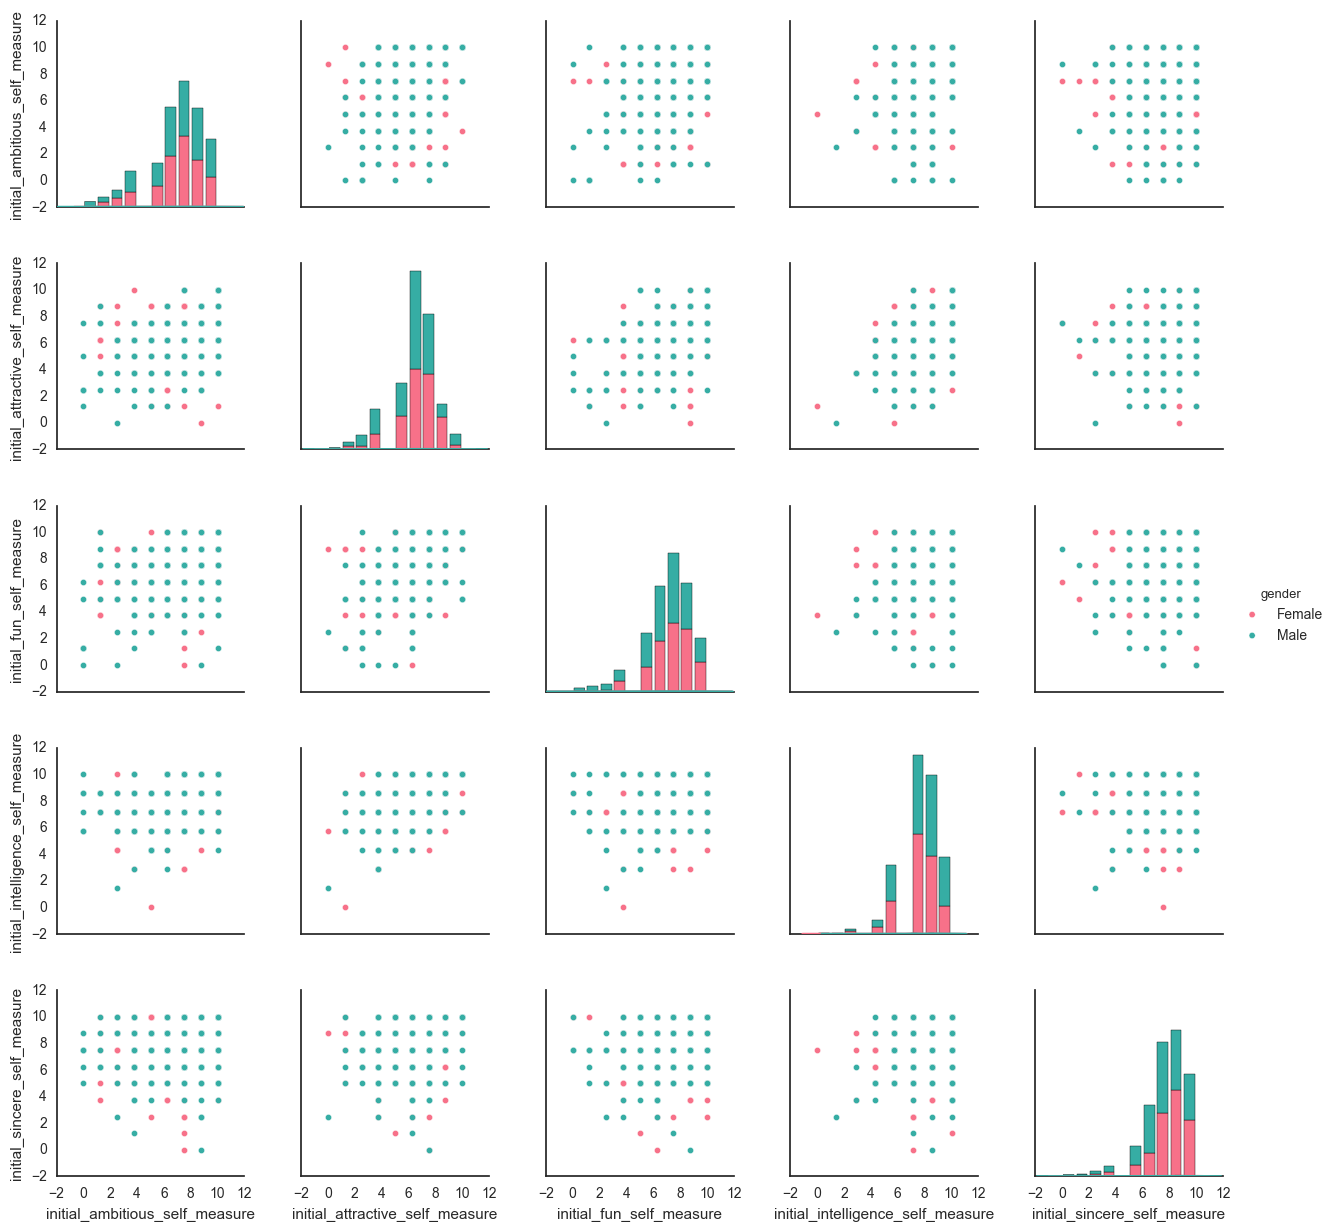

In [730]:
g = sns.pairplot(data=a.dropna(), hue="gender", palette="husl")
g.map_diag(sns.distplot,norm_hist=True)

In [679]:
iid_attributes.loc[:,iid_attributes.columns.str.contains(r'(self|gender)')]

,gender,initial_ambitious_self_measure,initial_attractive_self_measure,initial_fun_self_measure,initial_intelligence_self_measure,initial_sincere_self_measure
iid,,,,,,
1,Female,7.0,6.0,8.0,8.0,8.0
2,Female,3.0,7.0,10.0,8.0,5.0
3,Female,8.0,8.0,8.0,9.0,9.0
4,Female,8.0,7.0,9.0,7.0,8.0
5,Female,8.0,6.0,6.0,10.0,3.0
6,Female,5.0,5.0,8.0,9.0,7.0
7,Female,7.0,6.0,5.0,7.0,6.0
8,Female,8.0,7.0,8.0,8.0,4.0
9,Female,7.0,7.0,10.0,7.0,6.0


TypeError: Can't convert 'float' object to str implicitly

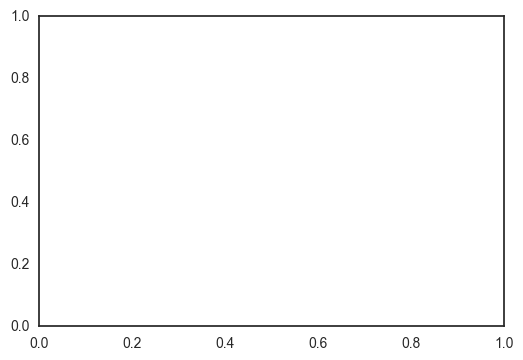

In [682]:
sns.distplot(iid_attributes.loc[:,iid_attributes.columns.str.contains(r'(self|gender)')])

In [ ]:
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
iid_attributes = frame[attributes_columns].groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[text_columns] = iid_attributes[text_columns].apply(lambda x: x.astype('category'))
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
female_attributes = iid_attributes.loc[iid_attributes.gender==0].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender==1].drop('gender',axis=1)
iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [ ]:
field.shape,ffield.shape,mfield.shape

In [ ]:
ffield = pd.DataFrame(female_attributes.field.value_counts()).rename(columns={'field':'female_counts'})
mfield = pd.DataFrame(male_attributes.field.value_counts()).rename(columns={'field':'male_counts'})

In [ ]:
from sklearn.preprocessing import scale
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(scale(field),metric='correlation')

In [ ]:
corr = pd.DataFrame(1-dist,columns=field.index,index=field.index)

In [ ]:
corr = pd.DataFrame(1-dist,columns=field.index,index=field.index)
#corr = field.apply(lambda x: x/field.sum(1)).fillna(0).T.corr()
corr = corr.where(lambda x: (-.3>x) | (x>.3))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
field.loc['English']

In [ ]:
frame.field_cd.isnull().sum()

In [ ]:
field.index.shape,frame.field_cd.unique().shape

In [ ]:
fframe.field.value_counts().loc['Non_Fiction']#,fframe.field.value_counts().loc['English']

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=15, yticklabels=15,robust=False,
            linewidths=.01, cbar_kws={"shrink": .3},ax=ax,)

## Predict

In [19]:
fmask_attributes = filled_attributes_frame.loc[frame.gender==0].drop('gender',axis=1)
mmask_attributes =  filled_attributes_frame.loc[frame.gender==1].drop('gender',axis=1)

In [20]:
grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

In [21]:
merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [22]:
dataset = merged_attributes
X = merged_attributes.drop("match",axis=1)
y = merged_attributes["match"]
predictors = merged_attributes.drop("match",axis=1).columns

In [45]:
from sklearn.linear_model import LogisticRegression 
#from imblearn import over_sampling,combine
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
def modelfit(model, data, xcolumns, ycolumn, title, test_size=.25, n_folds=3):
    from sklearn.cross_validation import StratifiedKFold, train_test_split,cross_val_score
    from sklearn.metrics import classification_report, accuracy_score, roc_auc_score 
    
    data[xcolumns] = scale(data[xcolumns])
    
    train_data, test_data = train_test_split(data, test_size=test_size,stratify=data.match)
    xtrain, ytrain, xtest, ytest = train_data[predictors], train_data['match'], test_data[predictors], test_data['match']
    
    kfold = StratifiedKFold(ytrain, 3)
    
    sns.set_palette(palette='muted')
    
    resamp = SMOTE()
    xresamp, yresamp = resamp.fit_sample(xtrain, ytrain)
    
    model.fit(xresamp, yresamp)        
    predictions = model.predict(xtest)
    probability = model.predict_proba(xtest)[:,1]
    cv_score = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='roc_auc')
    
    #precision, recall, fbeta_score, support = precision_recall_fscore_support(test_data['dec'].values, predictions)
    
    print(classification_report(test_data[ycolumn].values, predictions))
    print ("Classification\n")
    print ("Accuracy : {0:.4f}".format(accuracy_score(ytest, predictions)))
    print ("AUC Score (Train): {0:.4f}".format(roc_auc_score(ytest, probability)))
    print ("CV Score : Mean {0:.4f} | Std {0:.4f} | Min {0:.4f} | Max {0:.4f}".format(
            np.mean(cv_score),
            np.std(cv_score),
            np.min(cv_score),
            np.max(cv_score)))
    plt.figure(figsize=(13,5))
    plt.rc({'font.size': 10.0})
    
    if hasattr(model,'feature_importances_'):  
        feat_imp = pd.Series(model.feature_importances_, xcolumns).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances',fontsize=10)
        plt.title('Feature Importances: {}'.format(title),fontdict={'size': 10})
        plt.ylabel('Feature Importance',fontsize=10)
        
        
    elif hasattr(model,'coef_'):
        coefs_imp = pd.Series(model.coef_[0], xcolumns).sort_values(ascending=False)
        coefs_imp.plot(kind='bar',title='Coef Values: {}'.format(title),fontsize=10)
        plt.title('Coef Values',fontdict={'size': 10})
        plt.ylabel('Coef Values',fontsize=10)
        
    
    plt.show()
    print()
    print()
    return model, train_data, test_data

In [42]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [52]:
data=SFrame(train_data)

In [56]:
model.show()

Canvas is accessible via web browser at the URL: http://localhost:64285/index.html
Opening Canvas in default web browser.


In [57]:
from graphlab import text_analytics  

In [ ]:
model.feature_rescaling

In [ ]:
model = logistic_classifier.create(data,
                             target='match',
                             features=predictors)


PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 2812

Number of classes           : 2

Number of feature columns   : 94

Number of unpacked features : 94

Number of coefficients    : 95

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.284372     | 0.841038          | 0.805556            |

In [48]:
model = logistic_classifier.LogisticClassifier
#model = SVC(kernel='',probability=True)

resamp = SMOTE(k=4, m=12,)
xresamp, yresamp = resamp.fit_sample(train_data[predictors], train_data.match)

#kfold = StratifiedKFold(yresamp,n_folds=4)
#rfe = RFECV(model, step=1, cv=kfold, scoring='recall', estimator_params=None, verbose=1)

#rfe.fit(scale(xresamp),yresamp)
#print(classification_report(test_data.match, rfe.predict(scale(test_data[predictors]))))


model.fit(scale(xresamp),yresamp)
print(classification_report(test_data.match, model.predict(scale(test_data[predictors]))))

AttributeError: type object 'LogisticClassifier' has no attribute 'fit'

In [825]:
x=rfe.transform(scale(xresamp))

In [826]:
lgr = LogisticRegression(C=1,penalty='l1')
lgr.fit(x,yresamp)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [836]:
from sklearn.metrics import classification_report
print(classification_report(test_data.match, rfe.predict(scale(test_data[predictors]))))

             precision    recall  f1-score   support

          0       0.86      0.58      0.70       826
          1       0.19      0.52      0.28       160

avg / total       0.75      0.57      0.63       986



In [824]:
pd.Series(data=rfe.ranking_,index=predictors).where(pd.Series(data=rfe.ranking_,index=predictors)==1).dropna()

age_x                                         1.0
art_x                                         1.0
clubbing_x                                    1.0
concerts_x                                    1.0
exercise_x                                    1.0
field_cd_x                                    1.0
hiking_x                                      1.0
iid_x                                         1.0
initial_ambitious_opposite_importance_x       1.0
initial_ambitious_self_measure_x              1.0
initial_attractive_opposite_importance_x      1.0
initial_attractive_self_measure_x             1.0
initial_fun_importance_x                      1.0
initial_fun_self_measure_x                    1.0
initial_happy_expectation_x                   1.0
initial_intelligence_opposite_importance_x    1.0
initial_sincere_opposite_importance_x         1.0
movies_x                                      1.0
music_x                                       1.0
sports_x                                      1.0


             precision    recall  f1-score   support

          0       0.88      0.62      0.73       826
          1       0.22      0.55      0.31       160

avg / total       0.77      0.61      0.66       986

Classification

Accuracy : 0.6085
AUC Score (Train): 0.6000
CV Score : Mean 0.6342 | Std 0.6342 | Min 0.6342 | Max 0.6342


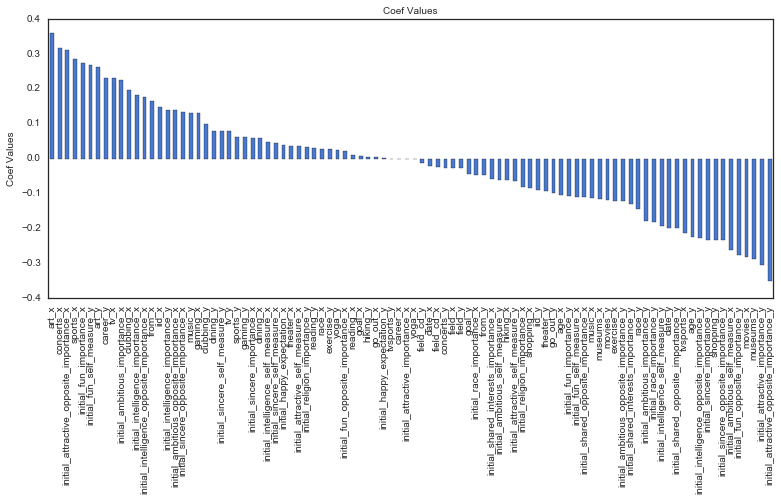

()
()


In [47]:
lgr = LogisticRegression(C=1,penalty='l1')

# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
lgr, train_data, test_data = modelfit(lgr, dataset, predictors, 'match', 'Logistic Regression', n_folds=3)

In [ ]:
from sklearn.metrics import auc
auc()

In [859]:
def roc_curve_plot(y_true, y_score):
    from sklearn.metrics import roc_curve, auc

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [860]:
lgr.predict_proba(test_data[predictors])[:,1]

array([  9.04153168e-43,   4.44956322e-47,   1.74519959e-48,
         3.84460349e-24,   1.99784417e-34,   1.12728291e-28,
         1.16767829e-48,   7.76138221e-41,   1.43699129e-40,
         2.99467932e-32,   3.25356548e-37,   5.32789072e-33,
         4.21494573e-25,   2.97661789e-44,   2.62172794e-37,
         2.58081607e-42,   7.50022487e-33,   8.10697866e-27,
         7.89797945e-52,   9.78282794e-38,   4.66283341e-43,
         1.88288534e-49,   5.20345569e-32,   3.32979183e-45,
         1.21993298e-29,   1.90361030e-32,   2.93218324e-33,
         1.77356605e-34,   1.26714447e-33,   6.37107784e-29,
         5.61933874e-29,   6.69045915e-31,   2.27008034e-29,
         1.13973795e-31,   1.69311179e-41,   3.79784680e-50,
         2.63925425e-59,   1.17997057e-38,   1.76392310e-30,
         2.17977093e-27,   2.17415958e-27,   2.25914257e-33,
         6.43001419e-28,   1.79287187e-41,   5.34470642e-47,
         1.17567550e-32,   1.38919844e-38,   5.31394229e-32,
         6.32736856e-29,

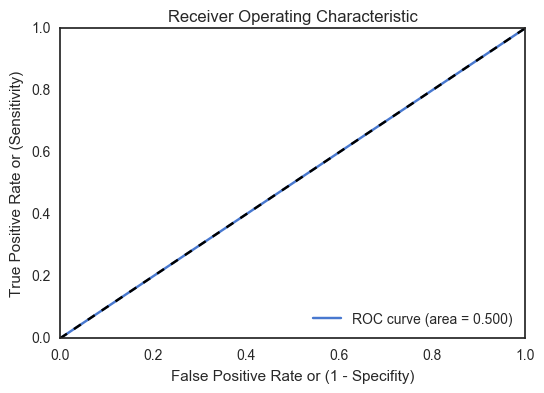

In [861]:
roc_curve_plot(y_true=test_data['match'],y_score=lgr.predict_proba(test_data[predictors])[:,1])